# Dengue Fever Prediction using Ensemble Learning Approach - URK21CS1134

## 2. Importing Libraries<a id='imp-lib'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats


In [2]:
df = pd.read_csv('dengue_disease.csv')

In [3]:
df.head()

,age,gender,fever_type,platelet_count,white_blood_cell_count,presence_of_rash,dengue_serotype,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,disease_severity,disease_status
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# renaming features to proper name
#dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
#       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
#df.columns = ['age', 'gender', 'fever_type', 'platelet_count', 'white_blood_cell_count', 'presence_of_rash', 'dengue_serotype', 'platelet_production_rate',
#              'presence_of_bleeding', 'severity_of_symptoms', 'disease_severity', 'disease_status']



In [6]:
df.head()

,age,gender,fever_type,platelet_count,white_blood_cell_count,presence_of_rash,dengue_serotype,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,disease_severity,disease_status
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
# converting features to categorical features 

df['fever_type'][df['fever_type'] == 1] = 'Saddleback Fever'
df['fever_type'][df['fever_type'] == 2] = 'Biphasic Fever'
df['fever_type'][df['fever_type'] == 3] = 'Breakbone Fever'
df['fever_type'][df['fever_type'] == 4] = 'Rebound Fever'



df['dengue_serotype'][df['dengue_serotype'] == 0] = 'DENV-1'#low level
df['dengue_serotype'][df['dengue_serotype'] == 1] = 'DENV-2'#moderate level
df['dengue_serotype'][df['dengue_serotype'] == 2] = 'DENV-3'#high level
#df['dengue_serotype'][df['dengue_serotype'] == 3] = 'DENV-4' #outbreak level



df['disease_severity'][df['disease_severity'] == 1] = 'Mild Dengue'
df['disease_severity'][df['disease_severity'] == 2] = 'Moderate Dengue'
df['disease_severity'][df['disease_severity'] == 3] = 'Severe Dengue'

df["gender"] = df.gender.apply(lambda  x:'male' if x==1 else 'female')

In [8]:
df['fever_type'].value_counts()

fever_type
Rebound Fever       625
Breakbone Fever     283
Biphasic Fever      216
Saddleback Fever     66
Name: count, dtype: int64

In [9]:
df['dengue_serotype'].value_counts()

dengue_serotype
DENV-1    684
DENV-3    325
DENV-2    181
Name: count, dtype: int64

In [10]:
df['disease_severity'].value_counts()

disease_severity
Moderate Dengue    582
Mild Dengue        526
Severe Dengue       81
0                    1
Name: count, dtype: int64

In [11]:
#dropping row with disease_severity =0
df.drop(df[df.disease_severity ==0].index, inplace=True)
#checking distribution
df['disease_severity'].value_counts()

disease_severity
Moderate Dengue    582
Mild Dengue        526
Severe Dengue       81
Name: count, dtype: int64

In [12]:
# checking the top 5 entries of dataset after feature encoding
df.head()

,age,gender,fever_type,platelet_count,white_blood_cell_count,presence_of_rash,dengue_serotype,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,disease_severity,disease_status
0,40,male,Biphasic Fever,140,289,0,DENV-1,172,0,0.0,Mild Dengue,0
1,49,female,Breakbone Fever,160,180,0,DENV-1,156,0,1.0,Moderate Dengue,1
2,37,male,Biphasic Fever,130,283,0,DENV-2,98,0,0.0,Mild Dengue,0
3,48,female,Rebound Fever,138,214,0,DENV-1,108,1,1.5,Moderate Dengue,1
4,54,male,Breakbone Fever,150,195,0,DENV-1,122,0,0.0,Mild Dengue,0


In [13]:
## Checking missing entries in the dataset columnwise
df.isna().sum()

age                         0
gender                      0
fever_type                  0
platelet_count              0
white_blood_cell_count      0
presence_of_rash            0
dengue_serotype             0
platelet_production_rate    0
presence_of_bleeding        0
severity_of_symptoms        0
disease_severity            0
disease_status              0
dtype: int64

## 5. Exploratory Data Analysis (EDA) <a id='data-eda'></a>

shape of the dataset

In [14]:
df.shape

(1189, 12)

summary statistics of numerical columns

In [15]:
df.describe(include =[np.number])

,age,platelet_count,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,disease_status
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


summary statistics of categorical columns

In [16]:
#df.describe(include =[np.object])

In [17]:
# Summary statistics of categorical columns
df.describe(include=['object'])


,gender,fever_type,dengue_serotype,disease_severity
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,Rebound Fever,DENV-1,Moderate Dengue
freq,908,625,683,582


### Distribution of Dengue Fever (target variable)

Plot of attrition of patient

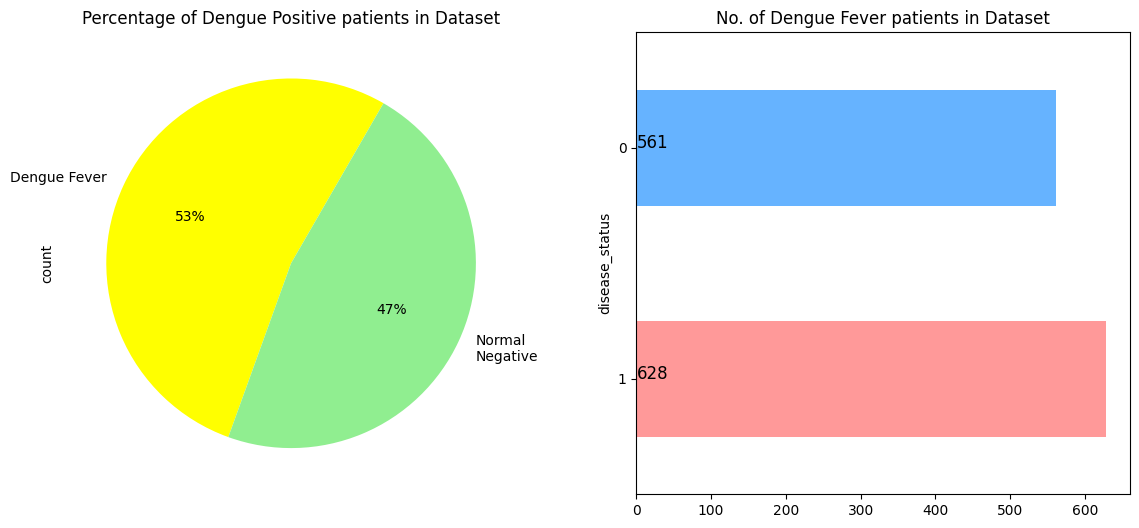

In [18]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

# Pie chart
colors = ['yellow', 'lightgreen'] 
ax1 = df['disease_status'].value_counts().plot.pie(x="Dengue Fever""\nPositive", y='no.of patients', 
                                                   autopct="%1.0f%%", labels=["Dengue Fever", "Normal""\nNegative"], 
                                                   startangle=60, ax=ax1, colors=colors)
ax1.set(title='Percentage of Dengue Positive patients in Dataset')

# Bar chart
colors = ['#ff9999', '#66b3ff']  # Specify colors for each category
ax2 = df["disease_status"].value_counts().plot(kind="barh", ax=ax2, color=colors)
for i, j in enumerate(df["disease_status"].value_counts().values):
    ax2.text(.5, i, j, fontsize=12)
ax2.set(title='No. of Dengue Fever patients in Dataset')

plt.show()


### Checking Gender & Agewise Distribution

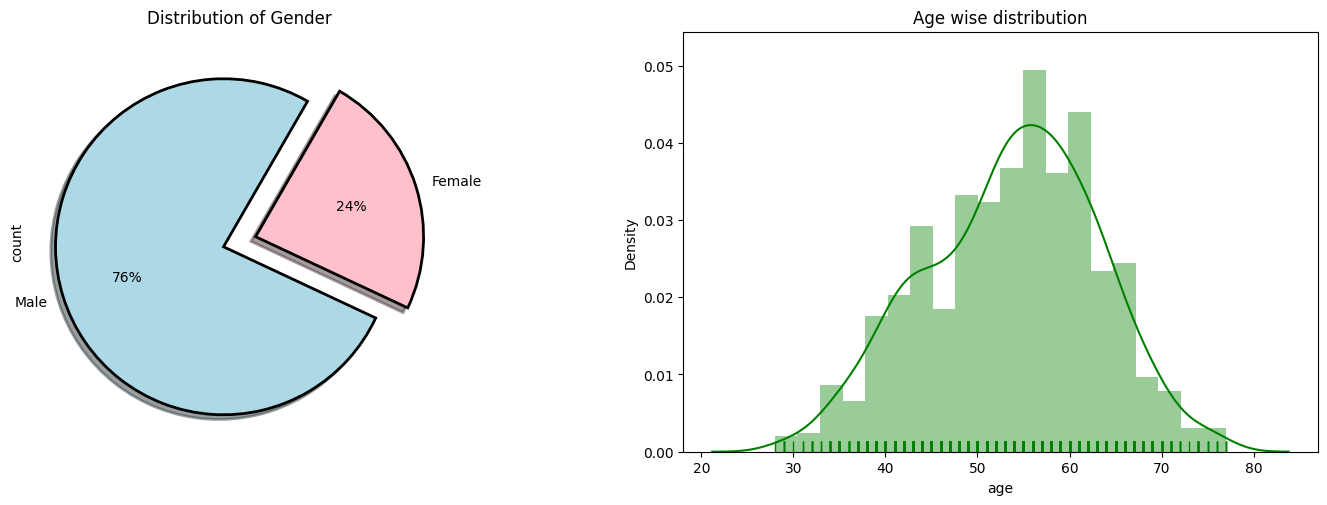

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

# Pie chart
plt.subplot(221)
df["gender"].value_counts().plot.pie(autopct="%1.0f%%", colors=['lightblue', 'pink'],  # Specify colors for each category
                                      startangle=60, labels=["Male", "Female"],
                                      wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[0.1, 0.1], shadow=True)
plt.title("Distribution of Gender")

# Density plot
plt.subplot(222)
ax = sns.distplot(df['age'], rug=True, color='green')  # Specify color for the plot
plt.title("Age wise distribution")

plt.show()


In [20]:
df.columns

Index(['age', 'gender', 'fever_type', 'platelet_count',
       'white_blood_cell_count', 'presence_of_rash', 'dengue_serotype',
       'platelet_production_rate', 'presence_of_bleeding',
       'severity_of_symptoms', 'disease_severity', 'disease_status'],
      dtype='object')

As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

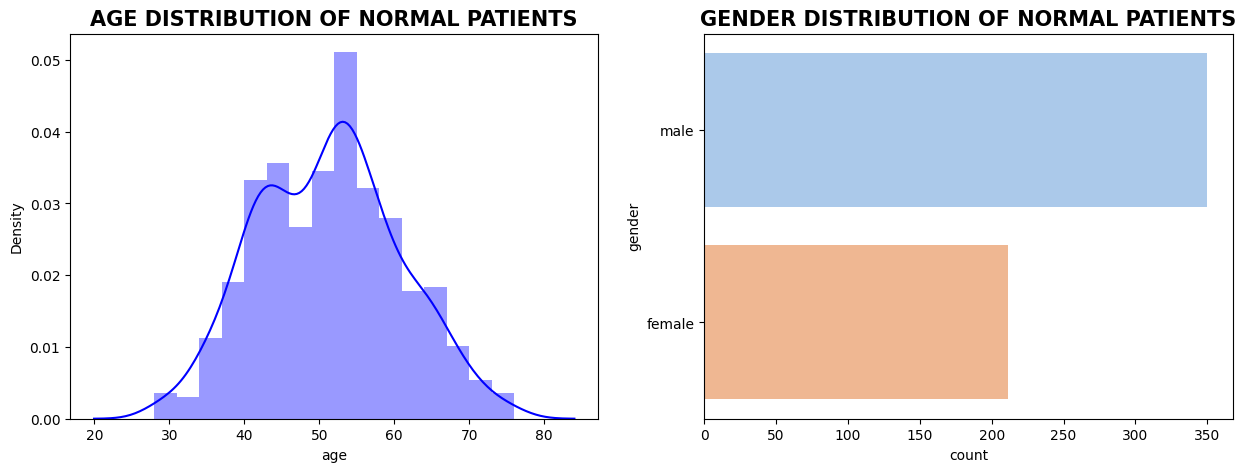

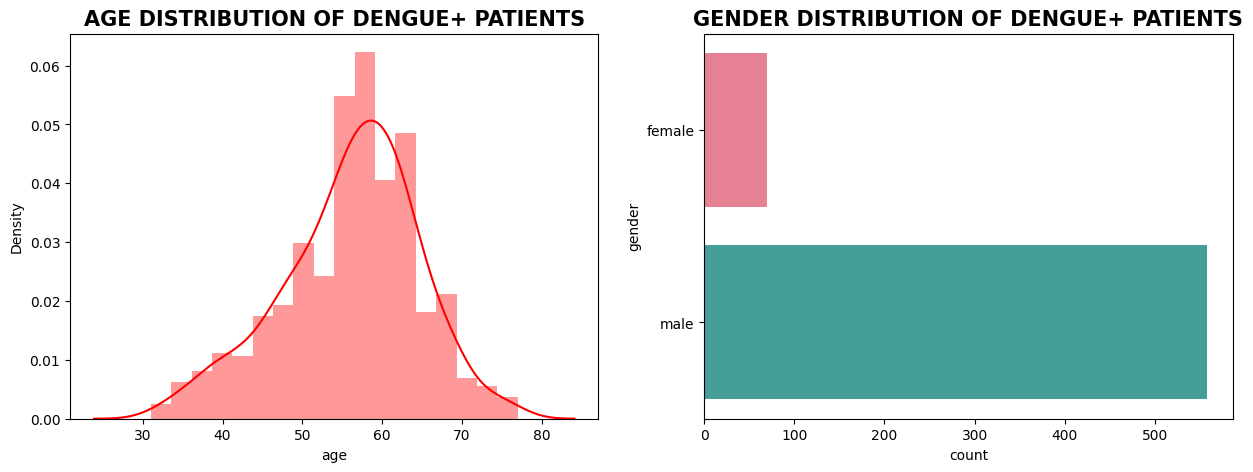

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating separate DataFrame for normal and dengue patients
attr_1 = df[df['disease_status'] == 1]
attr_0 = df[df['disease_status'] == 0]

# Plotting normal patients
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.distplot(attr_0['age'], color='blue')
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(attr_0['gender'], palette='pastel')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')
plt.show()

# Plotting dengue patients
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.distplot(attr_1['age'], color='red')  # Change color here
plt.title('AGE DISTRIBUTION OF DENGUE+ PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(attr_1['gender'], palette='husl')
plt.title('GENDER DISTRIBUTION OF DENGUE+ PATIENTS', fontsize=15, weight='bold')
plt.show()


### Distribution of Type OF Fever

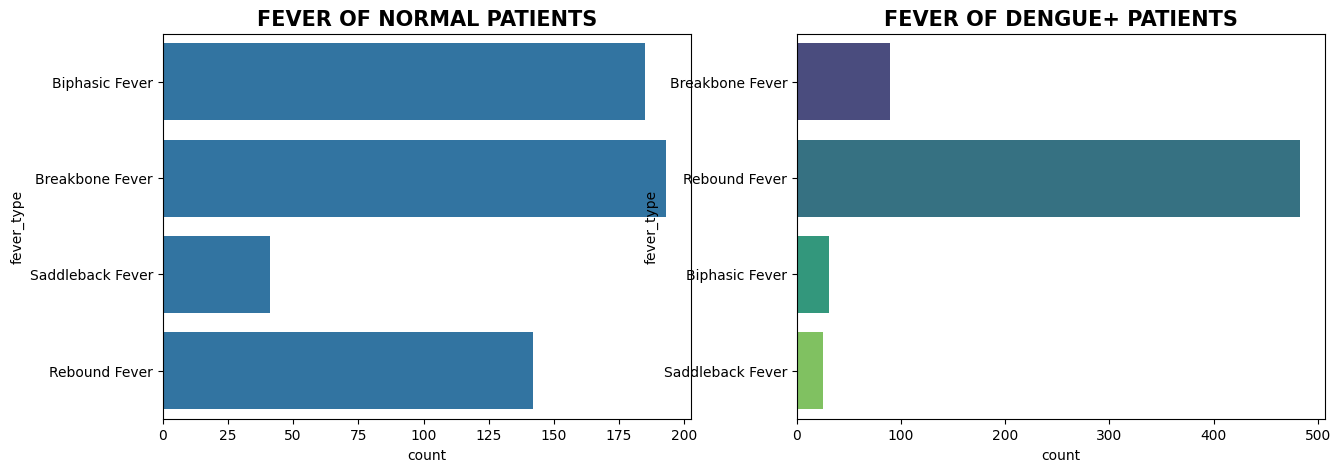

In [22]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['fever_type'])
plt.title('FEVER OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['fever_type'], palette='viridis')
plt.title('FEVER OF DENGUE+ PATIENTS', fontsize=15, weight='bold' )
plt.show()

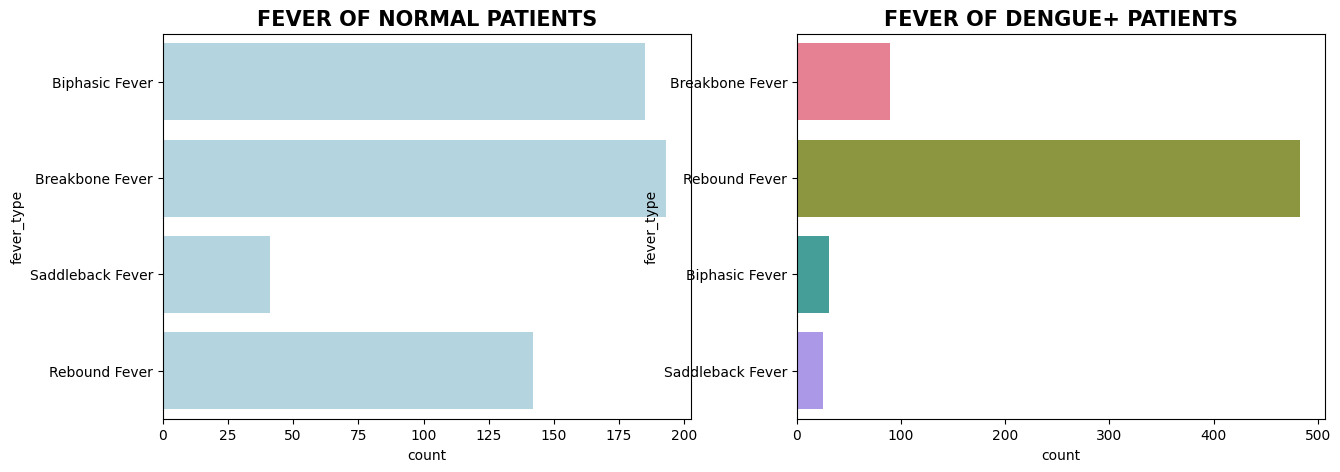

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting normal patients
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(y=attr_0['fever_type'], color='lightblue')  # Change color here and use 'y' for vertical orientation
plt.title('FEVER OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Plotting dengue patients
ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(y=attr_1['fever_type'], palette='husl')  # Use 'y' for vertical orientation
plt.title('FEVER OF DENGUE+ PATIENTS', fontsize=15, weight='bold')
plt.show()


Exploring the Dengue patients based on Fever Type

In [24]:
plot_criteria= ['fever_type', 'disease_status']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

disease_status,0,1
fever_type,,
Biphasic Fever,32.980000,4.940000
Breakbone Fever,34.400000,14.170000
Rebound Fever,25.310000,76.910000
Saddleback Fever,7.310000,3.980000


### Distribution of Serotype

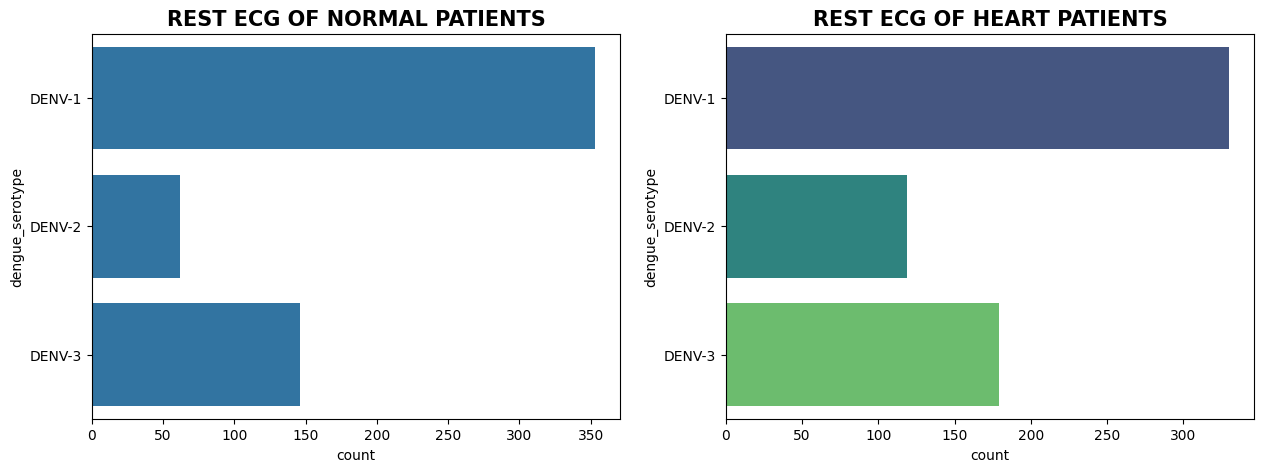

In [25]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['dengue_serotype'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['dengue_serotype'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

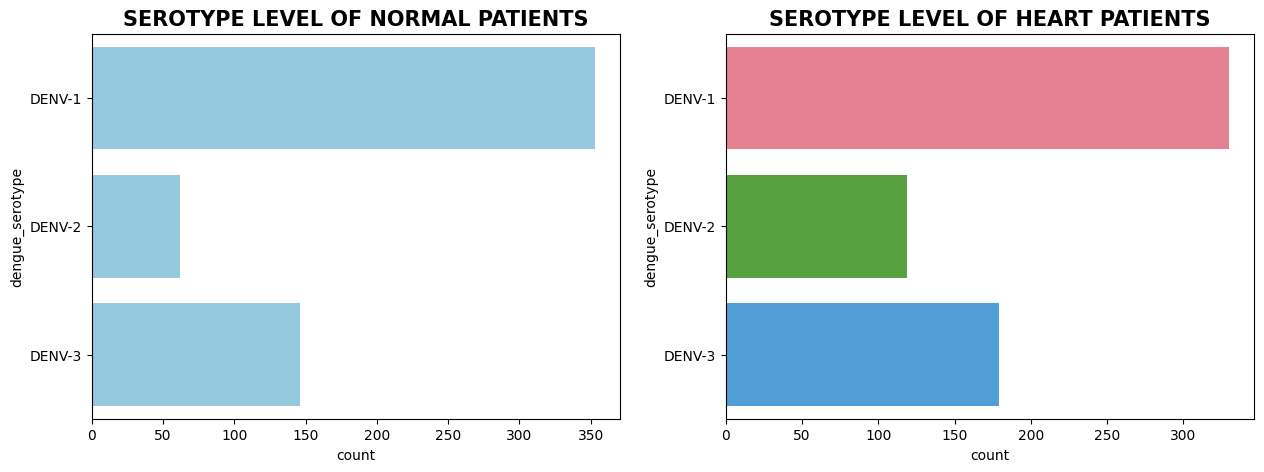

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting normal patients
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(attr_0['dengue_serotype'], color='skyblue')  
plt.title('SEROTYPE LEVEL OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Plotting heart patients
ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(attr_1['dengue_serotype'], palette='husl')  
plt.title('SEROTYPE LEVEL OF HEART PATIENTS', fontsize=15, weight='bold')
plt.show()


#Exploring the Heart Disease patients based on REST ECG

In [27]:
plot_criteria= ['dengue_serotype', 'disease_status']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

disease_status,0,1
dengue_serotype,,
DENV-1,62.920000,52.550000
DENV-2,11.050000,18.950000
DENV-3,26.020000,28.500000


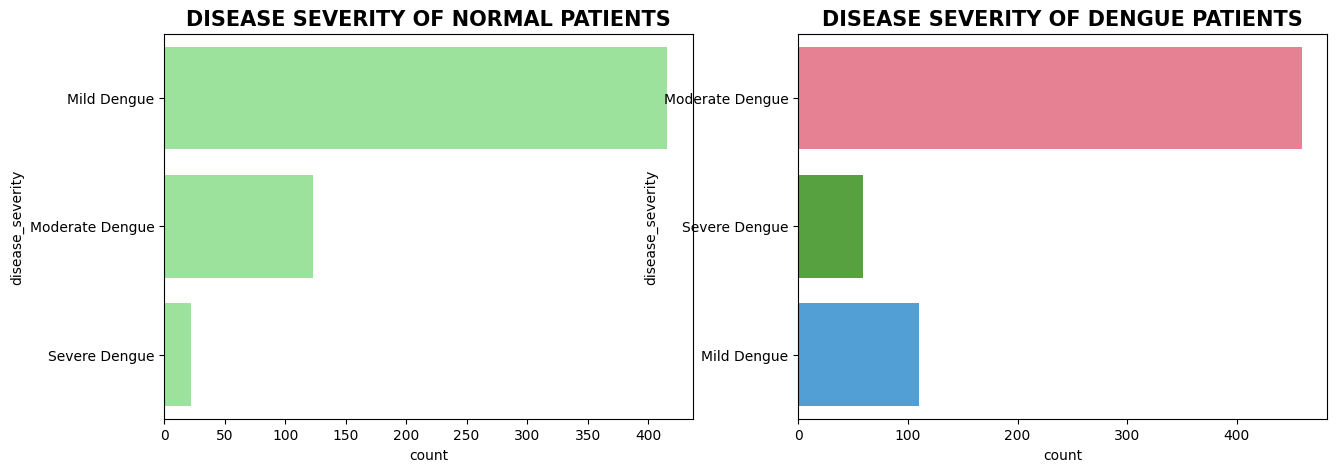

In [28]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['disease_severity'], color='lightgreen')
plt.title('DISEASE SEVERITY OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['disease_severity'], palette='husl')
plt.title('DISEASE SEVERITY OF DENGUE PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [29]:
#Exploring the Heart Disease patients based on Fever Severity

In [30]:
plot_criteria= ['disease_severity', 'disease_status']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

disease_status,0,1
disease_severity,,
Mild Dengue,74.150000,17.520000
Moderate Dengue,21.930000,73.090000
Severe Dengue,3.920000,9.390000


### Distribution of Numerical features

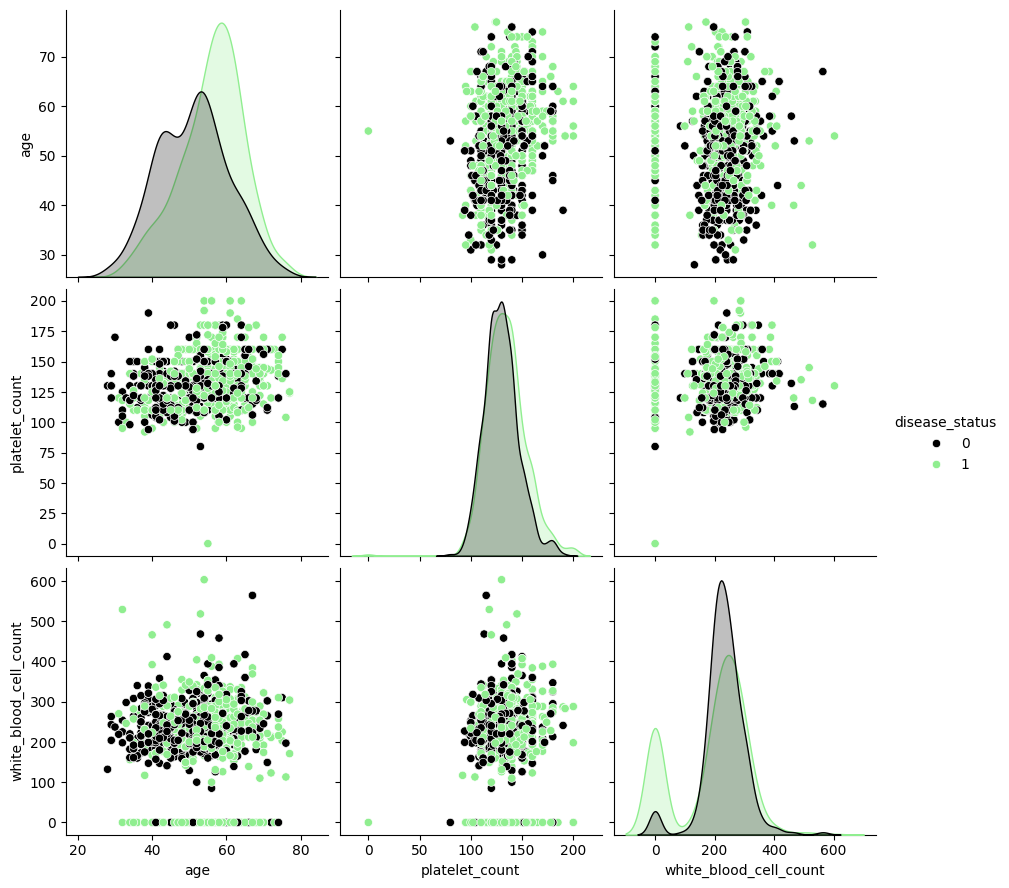

In [31]:
import seaborn as sns

custom_palette = ['black', 'lightgreen']
custom_height = 3 
sns.pairplot(df, hue='disease_status', vars=['age', 'platelet_count', 'white_blood_cell_count'], palette=custom_palette, height=custom_height)
plt.show()

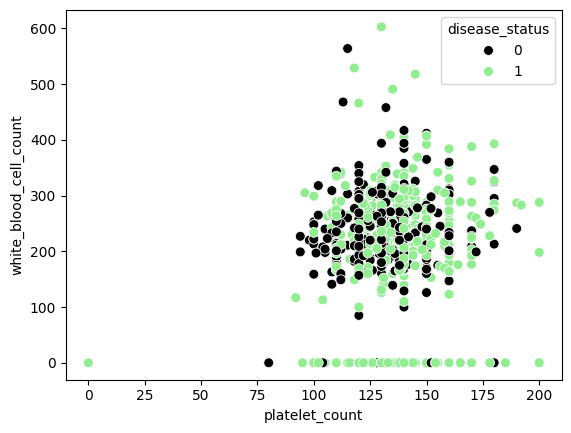

In [32]:
custom_palette = ['black', 'lightgreen']
custom_marker_size = 50 
sns.scatterplot(x='platelet_count', y='white_blood_cell_count', hue='disease_status', data=df, palette=custom_palette, s=custom_marker_size)
plt.show()

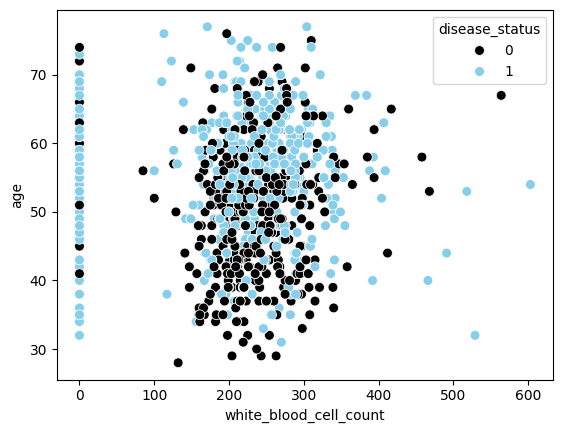

In [33]:
custom_palette = ['black', 'skyblue']
custom_marker_size = 50

sns.scatterplot(x='white_blood_cell_count', y='age', hue='disease_status', data=df, palette=custom_palette, s=custom_marker_size)
plt.show()


## 6. Outlier Detection & Removal <a id='data-out'></a>

filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

In [34]:
df_numeric = df[['age','platelet_count','white_blood_cell_count','platelet_production_rate']]

In [35]:
df_numeric.head()

,age,platelet_count,white_blood_cell_count,platelet_production_rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [36]:
import numpy as np
from scipy import stats

z = np.abs(stats.zscore(df_numeric))
z_array = z.values
print(z_array)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


Defining threshold for filtering outliers 

In [37]:
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


filtering outliers retaining only those data points which are below threshhold

In [38]:
df = df[(z < 3).all(axis=1)]

In [39]:
df.shape

(1172, 12)

Encoding categorical variables

In [40]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,platelet_count,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,disease_status,gender_male,fever_type_Breakbone Fever,fever_type_Rebound Fever,fever_type_Saddleback Fever,dengue_serotype_DENV-2,dengue_serotype_DENV-3,disease_severity_Moderate Dengue,disease_severity_Severe Dengue
0,40,140,289,0,172,0,0.0,0,True,False,False,False,False,False,False,False
1,49,160,180,0,156,0,1.0,1,False,True,False,False,False,False,True,False
2,37,130,283,0,98,0,0.0,0,True,False,False,False,True,False,False,False
3,48,138,214,0,108,1,1.5,1,False,False,True,False,False,False,True,False
4,54,150,195,0,122,0,0.0,0,True,True,False,False,False,False,False,False


In [41]:
df.shape

(1172, 16)

Dividing the dataset into feature X and target variable y

In [42]:
X = df.drop(['disease_status'],axis=1)
y = df['disease_status']

## Checking Correlation 

Correlation with Response Variable class

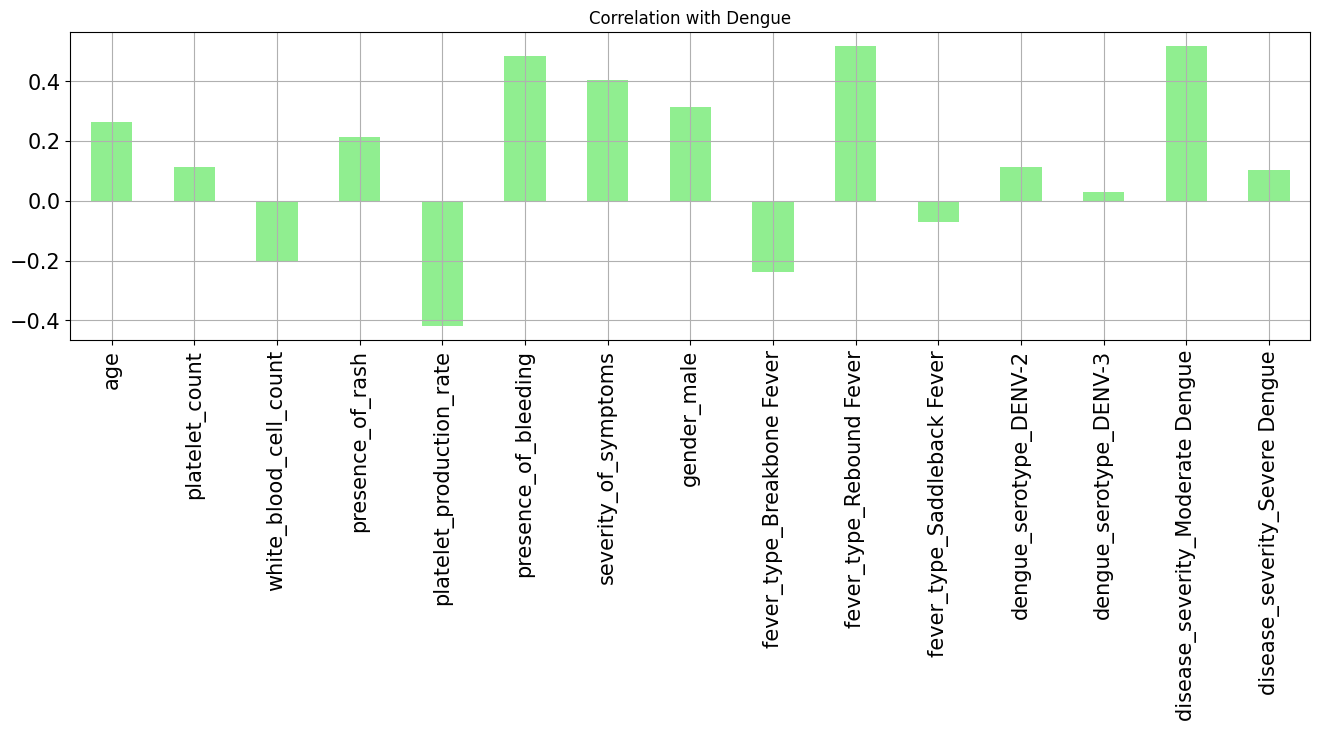

In [43]:
correlation_with_dengue = X.corrwith(df['disease_status'])
correlation_with_dengue.plot.bar(figsize=(16, 4), title="Correlation with Dengue", fontsize=15, rot=90, grid=True, color='lightgreen')
plt.show()

## 7. Train Test Split <a id='data-train'></a>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

## Distribution of traget variable in train test split

In [45]:
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
disease_status
1    491
0    446
Name: count, dtype: int64
Distribution of traget variable in test set
disease_status
1    123
0    112
Name: count, dtype: int64


In [46]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


In [47]:
df.columns

Index(['age', 'platelet_count', 'white_blood_cell_count', 'presence_of_rash',
       'platelet_production_rate', 'presence_of_bleeding',
       'severity_of_symptoms', 'disease_status', 'gender_male',
       'fever_type_Breakbone Fever', 'fever_type_Rebound Fever',
       'fever_type_Saddleback Fever', 'dengue_serotype_DENV-2',
       'dengue_serotype_DENV-3', 'disease_severity_Moderate Dengue',
       'disease_severity_Severe Dengue'],
      dtype='object')

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','platelet_count','white_blood_cell_count','platelet_production_rate','severity_of_symptoms']] = scaler.fit_transform(X_train[['age','platelet_count','white_blood_cell_count','platelet_production_rate','severity_of_symptoms']])
X_train.head()

,age,platelet_count,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,gender_male,fever_type_Breakbone Fever,fever_type_Rebound Fever,fever_type_Saddleback Fever,dengue_serotype_DENV-2,dengue_serotype_DENV-3,disease_severity_Moderate Dengue,disease_severity_Severe Dengue
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,True,False,True,False,False,False,False,True
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,True,False,True,False,True,False,False,False
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,True,False,True,False,False,False,True,False
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,True,False,True,False,False,False,True,False
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,True,False,True,False,False,False,True,False


In [49]:
X_test[['age','platelet_count','white_blood_cell_count','platelet_production_rate','severity_of_symptoms']] = scaler.transform(X_test[['age','platelet_count','white_blood_cell_count','platelet_production_rate','severity_of_symptoms']])
X_test.head()

,age,platelet_count,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,gender_male,fever_type_Breakbone Fever,fever_type_Rebound Fever,fever_type_Saddleback Fever,dengue_serotype_DENV-2,dengue_serotype_DENV-3,disease_severity_Moderate Dengue,disease_severity_Severe Dengue
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,True,False,False,False,False,True,True,False
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,True,False,False,False,False,False,False,False
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,False,False,True,False,False,True,True,False
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,True,False,True,False,False,True,True,False
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,True,False,True,False,False,True,True,False


## 8. Cross Validation <a id='cross-val'></a>

In this step, we will build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method.

In [50]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

In [51]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle = True) #random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [52]:
models = GetBasedModel()
names, results = BasedLine2(X_train, y_train, models)

LR_L2: 0.852620 (0.038673)
LDA: 0.852791 (0.027803)
KNN7: 0.839922 (0.046107)
KNN5: 0.854839 (0.020518)
KNN9: 0.849542 (0.040997)
KNN11: 0.839899 (0.028642)
CART: 0.891123 (0.029836)
NB: 0.845287 (0.029766)
SVM Linear: 0.857046 (0.026787)
SVM RBF: 0.854850 (0.030357)
AB: 0.860169 (0.014092)
GBM: 0.892313 (0.026422)
RF_Ent100: 0.932761 (0.010734)
RF_Gini100: 0.930657 (0.025233)
ET100: 0.918897 (0.024839)
ET500: 0.918966 (0.020108)
MLP: 0.867650 (0.030393)
SGD3000: 0.843148 (0.023733)
XGB_2000: 0.916770 (0.028925)
XGB_500: 0.925269 (0.012748)
XGB_100: 0.919927 (0.036587)
XGB_1000: 0.927454 (0.026884)
ET1000: 0.924205 (0.016282)


## 9. Model building <a id='data-model'></a>

### Random Forest Classifier (criterion = 'entropy')

In [53]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [54]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [55]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [56]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

### XGBoost (n_estimators=500)

In [57]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [58]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [59]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [60]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### Decision Tree Classifier (CART)

In [61]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Gradient boosting machine 

In [62]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

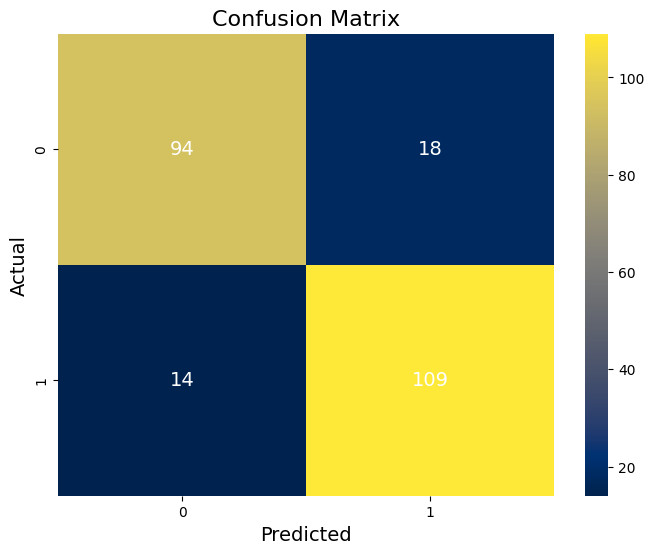

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.893617,0.865672,0.943089,0.839286,0.902724,0.891188,3.834431,0.789339


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting confusion matrix heatmap with custom color
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, cmap='cividis', fmt='g', annot_kws={"size": 14, "color": 'white'})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN / (TN + FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc = accuracy_score(y_test, y_pred_rfe)
roc = roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)
mathew = matthews_corrcoef(y_test, y_pred_rfe)

# Im Creating DataFrame with model results
model_results = pd.DataFrame(
    [['Random Forest', acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
    columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])

# Function to apply background color based on specific conditions
def apply_color(row):
    if row['Accuracy'] > 0.7:
        return ['background-color: lightgreen']*len(row)
# Applying color to each row based on conditions
styled_model_results = model_results.style.apply(apply_color, axis=1)

# Displaying the styled DataFrame
styled_model_results


## Comparison with other Models

In [120]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef, log_loss

data = {'MLP': y_pred_mlp, 
        'KNN': y_pred_knn, 
        'Extra tree classifier': y_pred_et_100,
        'XGB': y_pred_xgb, 
        'SVC': y_pred_svc, 
        'SGD': y_pred_sgd,
        'Adaboost': y_pred_ada, 
        'CART': y_pred_decc, 
        'GBM': y_pred_gbm }

results_list = []

for column in data:
    CM = confusion_matrix(y_test, data[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, data[column])
    acc = accuracy_score(y_test, data[column])
    roc = roc_auc_score(y_test, data[column])
    prec = precision_score(y_test, data[column])
    rec = recall_score(y_test, data[column])
    f1 = f1_score(y_test, data[column])
    mathew = matthews_corrcoef(y_test, data[column])
    
    results_list.append({'Model': column, 
                         'Accuracy': acc, 
                         'Precision': prec, 
                         'Sensitivity': rec, 
                         'Specificity': specificity, 
                         'F1 Score': f1, 
                         'ROC': roc, 
                         'Log_Loss': loss_log, 
                         'Mathew_corrcoefficient': mathew})

# Create DataFrame from results_list
model_results = pd.DataFrame(results_list)

def apply_color(row):
    if row['Accuracy'] > 0.88:
        return ['background-color: lightgreen']*len(row)
    elif row['Accuracy'] > 0.85:
        return ['background-color: lightcyan']*len(row)
    else:
        return ['background-color: lightyellow']*len(row)

styled_model_results = model_results.style.apply(apply_color, axis=1)
styled_model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,Mathew_corrcoefficient
0,MLP,0.829787,0.802920,0.894309,0.758929,0.846154,0.826619,6.135090,0.661697
1,KNN,0.812766,0.816000,0.829268,0.794643,0.822581,0.811956,6.748599,0.624501
2,Extra tree classifier,0.897872,0.866667,0.951220,0.839286,0.906977,0.895253,3.681054,0.798545
3,XGB,0.885106,0.869231,0.918699,0.848214,0.893281,0.883457,4.141186,0.770445
4,SVC,0.817021,0.798507,0.869919,0.758929,0.832685,0.814424,6.595222,0.634445
5,SGD,0.774468,0.864583,0.674797,0.883929,0.757991,0.779363,8.128994,0.567697
6,Adaboost,0.829787,0.832000,0.845528,0.812500,0.838710,0.829014,6.135090,0.658650
7,CART,0.863830,0.852713,0.894309,0.830357,0.873016,0.862333,4.908072,0.727364
8,GBM,0.863830,0.858268,0.886179,0.839286,0.872000,0.862732,4.908072,0.727050


### ROC AUC Curve

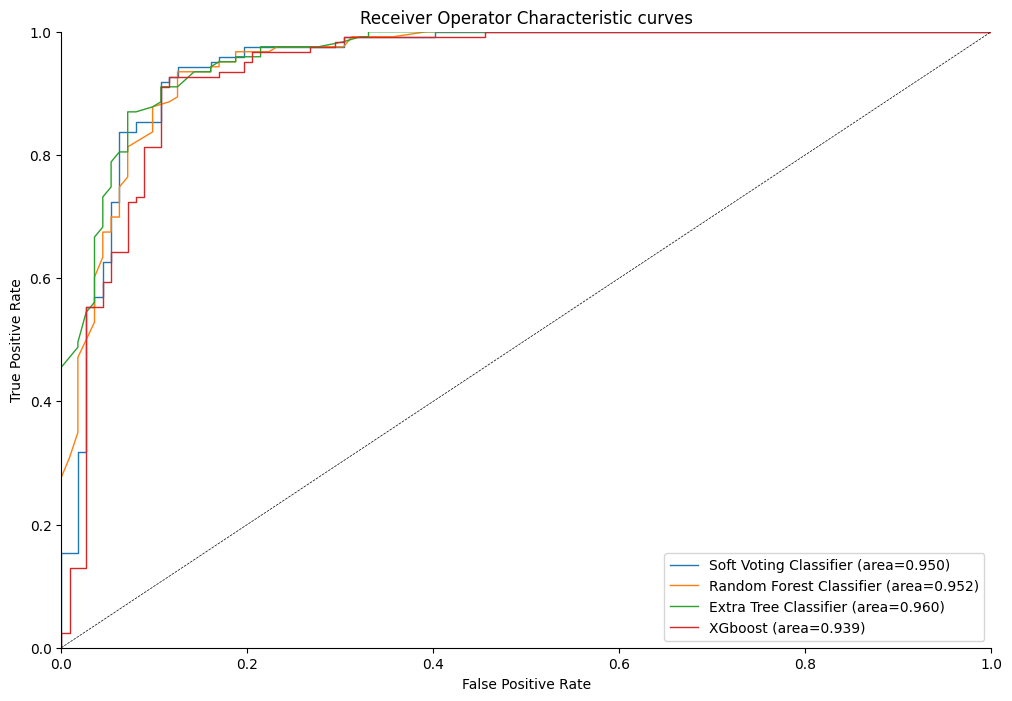

In [100]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define your classifiers
clf1 = RandomForestClassifier()
clf2 = ExtraTreesClassifier()
clf3 = XGBClassifier()

# Fit the classifiers with training data
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Define your roc_auc_plot function
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

# Assuming X_train, X_test, y_train, y_test are already defined
eclf1 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], voting='soft')
eclf1.fit(X_train, y_train)

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test, eclf1.predict_proba(X_test), label='Soft Voting Classifier', l='-')
roc_auc_plot(y_test, clf1.predict_proba(X_test), label='Random Forest Classifier', l='-')
roc_auc_plot(y_test, clf2.predict_proba(X_test), label='Extra Tree Classifier', l='-')
roc_auc_plot(y_test, clf3.predict_proba(X_test), label='XGboost', l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

plt.show()


## Precision Recall curve

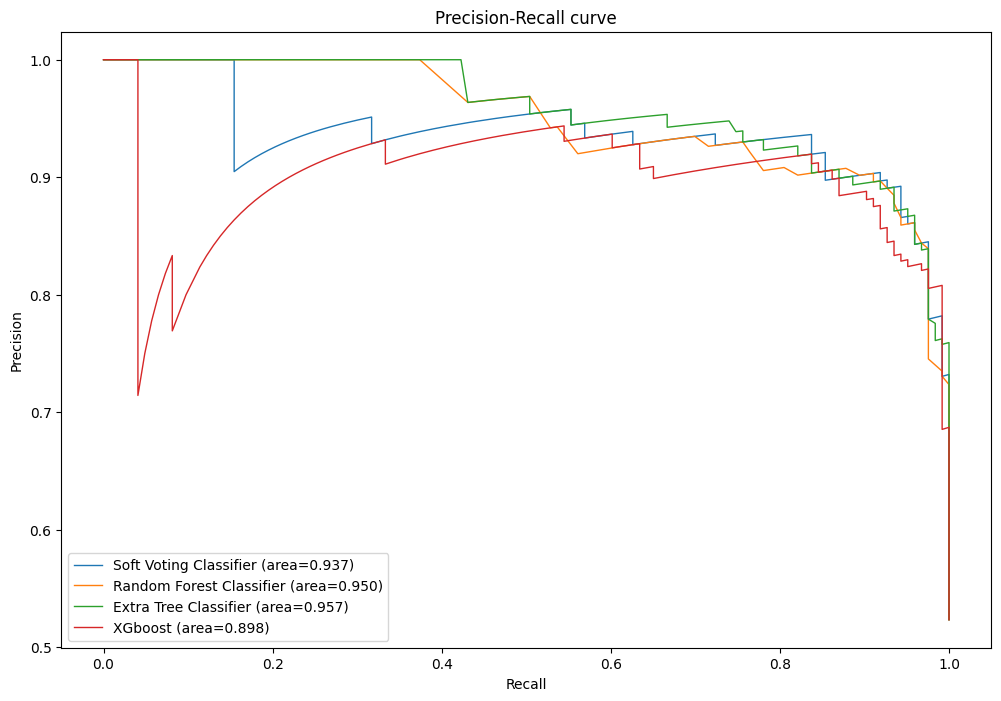

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Define your ExtraTreesClassifier with desired parameters
et_1000 = ExtraTreesClassifier(n_estimators=1000)

# Fit the ExtraTreesClassifier with training data
et_1000.fit(X_train, y_train)

# Define your precision_recall_plot function
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    precision, recall, _ = precision_recall_curve(y_true, y_proba[:,1])
    pr_auc = auc(recall, precision)
    ax.plot(recall, precision, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label, pr_auc))

# Assuming X_train, X_test, y_train, y_test are already defined
f, ax = plt.subplots(figsize=(12,8))

precision_recall_plot(y_test, eclf1.predict_proba(X_test), label='Soft Voting Classifier', l='-')
precision_recall_plot(y_test, rf_ent.predict_proba(X_test), label='Random Forest Classifier', l='-')
precision_recall_plot(y_test, et_1000.predict_proba(X_test), label='Extra Tree Classifier', l='-')
precision_recall_plot(y_test, xgb.predict_proba(X_test), label='XGboost', l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.set_title('Precision-Recall curve')

plt.show()


### 11.  Feature Selection

In [102]:
num_feats=11

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculating the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature naming
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

11 selected features


In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

11 selected features


In [104]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

11 selected features


In [105]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

5 selected features


In [106]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

6 selected features


In [107]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 614, number of negative: 558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 1172, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523891 -> initscore=0.095636
[LightGBM] [Info] Start training from score 0.095636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [108]:
import pandas as pd

# Define the feature names
feature_name = X.columns

# Convert lists to pandas Series
cor_support_series = pd.Series(cor_support)
chi_support_series = pd.Series(chi_support)
rfe_support_series = pd.Series(rfe_support)
embeded_lr_support_series = pd.Series(embeded_lr_support)
embeded_rf_support_series = pd.Series(embeded_rf_support)
embeded_lgb_support_series = pd.Series(embeded_lgb_support)

# Create a DataFrame to store feature selection results
feature_selection_df = pd.DataFrame({
    'Feature': feature_name,
    'Pearson': cor_support_series.astype(bool),
    'Chi-2': chi_support_series.astype(bool),
    'RFE': rfe_support_series.astype(bool),
    'Logistics': embeded_lr_support_series.astype(bool),
    'Random Forest': embeded_rf_support_series.astype(bool),
    'LightGBM': embeded_lgb_support_series.astype(bool)
})

# Count the selected times for each feature
feature_selection_df['Total'] = feature_selection_df.iloc[:, 1:].sum(axis=1)

# Sort the DataFrame based on the total count of selected times
feature_selection_df = feature_selection_df.sort_values(['Total', 'Feature'], ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df) + 1)

# Display the top features
feature_selection_df.head(num_feats)


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,white_blood_cell_count,True,True,True,True,True,True,6
2,severity_of_symptoms,True,True,True,True,True,True,6
3,platelet_production_rate,True,True,True,True,True,True,6
4,disease_severity_Moderate Dengue,True,True,True,True,True,True,6
5,presence_of_bleeding,True,True,True,True,True,False,5
6,age,True,True,True,False,True,False,4
7,presence_of_rash,True,True,True,False,False,False,3
8,fever_type_Saddleback Fever,True,True,True,False,False,False,3
9,disease_severity_Severe Dengue,True,True,True,False,False,False,3
10,dengue_serotype_DENV-3,True,True,True,False,False,False,3


In [109]:
df.columns

Index(['age', 'platelet_count', 'white_blood_cell_count', 'presence_of_rash',
       'platelet_production_rate', 'presence_of_bleeding',
       'severity_of_symptoms', 'disease_status', 'gender_male',
       'fever_type_Breakbone Fever', 'fever_type_Rebound Fever',
       'fever_type_Saddleback Fever', 'dengue_serotype_DENV-2',
       'dengue_serotype_DENV-3', 'disease_severity_Moderate Dengue',
       'disease_severity_Severe Dengue'],
      dtype='object')

In [110]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df.drop(['disease_status','platelet_count','gender_male','fever_type_Breakbone Fever','fever_type_Rebound Fever'],axis=1)
y = df['disease_status']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','white_blood_cell_count','platelet_production_rate','disease_severity_Moderate Dengue']] = scaler.fit_transform(X_train[['age','white_blood_cell_count','platelet_production_rate','disease_severity_Moderate Dengue']])
X_train.head()

,age,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,fever_type_Saddleback Fever,dengue_serotype_DENV-2,dengue_serotype_DENV-3,disease_severity_Moderate Dengue,disease_severity_Severe Dengue
478,0.673469,0.000000,1,0.303704,1,2.0,False,False,False,0.0,True
253,0.673469,0.594705,0,0.355556,1,0.0,False,True,False,0.0,False
273,0.551020,0.409369,0,0.466667,1,3.0,False,False,False,1.0,False
111,0.591837,0.519348,0,0.185185,1,3.0,False,False,False,1.0,False
50,0.448980,0.474542,0,0.400000,1,2.0,False,False,False,1.0,False


In [113]:
X_test[['age','white_blood_cell_count','platelet_production_rate','disease_severity_Moderate Dengue']] = scaler.transform(X_test[['age','white_blood_cell_count','platelet_production_rate','disease_severity_Moderate Dengue']])
X_test.head()

,age,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,fever_type_Saddleback Fever,dengue_serotype_DENV-2,dengue_serotype_DENV-3,disease_severity_Moderate Dengue,disease_severity_Severe Dengue
1024,0.693878,0.572301,0,0.266667,0,1.4,False,False,True,1.0,False
182,0.469388,0.456212,0,0.614815,0,0.0,False,False,False,0.0,False
785,0.346939,0.480652,0,0.629630,1,0.2,False,False,True,1.0,False
924,0.591837,0.562118,0,0.333333,1,0.6,False,False,True,1.0,False
780,0.612245,0.527495,0,0.466667,1,3.0,False,False,True,1.0,False


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

def GetBasedModel():
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    return models


from sklearn import model_selection

def BasedLine2(X_train, y_train, models):
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=5, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return names, results


In [115]:
from sklearn import model_selection

def BasedLine2(X_train, y_train, models):
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=5, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    return names, results


In [116]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR: 0.831297 (0.027798)
LDA: 0.825978 (0.033351)
KNN: 0.823805 (0.030132)
CART: 0.876218 (0.030568)
NB: 0.818463 (0.043898)
SVM: 0.826012 (0.030274)


## Soft voting

In [117]:
import xgboost as xgb
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

## 12 Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.897872,0.87218,0.943089,0.848214,0.90625,0.895652,3.681054,0.797405


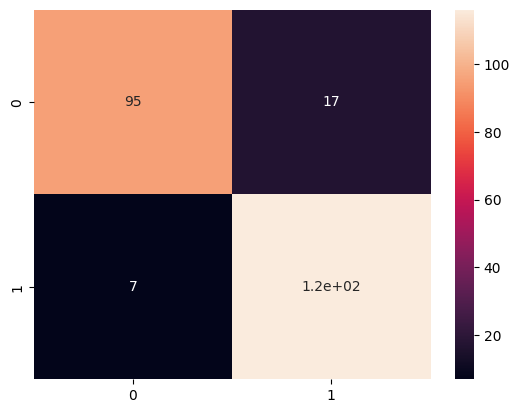

In [83]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [84]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

mlp = MLPClassifier(solver='lbfgs')
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [85]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [86]:
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,y_train)
y_pred_et1000 = et_1000.predict(X_test)

In [87]:
xgb = xgb.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [88]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [89]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [90]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [91]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [92]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [93]:
data = {             
                'Random Forest Entropy': y_pred_rfe, 
                'MLP2': y_pred_mlp, 
                'KNN2': y_pred_knn, 
                'EXtra tree classifier': y_pred_et1000,
                'XGB2': y_pred_xgb, 
                'SVC2': y_pred_svc, 
                'SGD2': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

results_list = []

for column in data:
    CM = confusion_matrix(y_test, data[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, data[column])
    acc = accuracy_score(y_test, data[column])
    roc = roc_auc_score(y_test, data[column])
    prec = precision_score(y_test, data[column])
    rec = recall_score(y_test, data[column])
    f1 = f1_score(y_test, data[column])
    mathew = matthews_corrcoef(y_test, data[column])
    
    results_list.append({'Model': column, 
                         'Accuracy': acc, 
                         'Precision': prec, 
                         'Sensitivity': rec, 
                         'Specificity': specificity, 
                         'F1 Score': f1, 
                         'ROC': roc, 
                         'Log_Loss': loss_log, 
                         'Mathew_corrcoefficient': mathew})

def apply_color(row):
    if row['Accuracy'] > 0.9:
        return ['background-color: lightgreen']*len(row)
    elif row['Accuracy'] > 0.8:
        return ['background-color: lightcyan']*len(row)
    else:
        return ['background-color: lightyellow']*len(row)


styled_model_results = model_results.style.apply(apply_color, axis=1)
styled_model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.897872,0.872180,0.943089,0.848214,0.906250,0.895652,3.681054,0.797405


In [94]:
data = {             
                'Random Forest Entropy': y_pred_rfe, 
                'MLP2': y_pred_mlp, 
                'KNN2': y_pred_knn, 
                'EXtra tree classifier': y_pred_et1000,
                'XGB2': y_pred_xgb, 
                'SVC2': y_pred_svc, 
                'SGD2': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

results_list = []

for column in data:
    CM = confusion_matrix(y_test, data[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, data[column])
    acc = accuracy_score(y_test, data[column])
    roc = roc_auc_score(y_test, data[column])
    prec = precision_score(y_test, data[column])
    rec = recall_score(y_test, data[column])
    f1 = f1_score(y_test, data[column])
    mathew = matthews_corrcoef(y_test, data[column])
    
    results_list.append({'Model': column, 
                         'Accuracy': acc, 
                         'Precision': prec, 
                         'Sensitivity': rec, 
                         'Specificity': specificity, 
                         'F1 Score': f1, 
                         'ROC': roc, 
                         'Log_Loss': loss_log, 
                         'Mathew_corrcoefficient': mathew})

# Create DataFrame from the results list
model_results = pd.DataFrame(results_list)

# Define a function to apply background color based on accuracy
def apply_color(row):
    if row['Accuracy'] > 0.9:
        return ['background-color: lightgreen']*len(row)
    elif row['Accuracy'] > 0.8:
        return ['background-color: lightcyan']*len(row)
    else:
        return ['background-color: lightyellow']*len(row)

# Apply the function to the DataFrame
styled_model_results = model_results.style.apply(apply_color, axis=1)
styled_model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,Mathew_corrcoefficient
0,Random Forest Entropy,0.893617,0.865672,0.943089,0.839286,0.902724,0.891188,3.834431,0.789339
1,MLP2,0.829787,0.802920,0.894309,0.758929,0.846154,0.826619,6.135090,0.661697
2,KNN2,0.812766,0.816000,0.829268,0.794643,0.822581,0.811956,6.748599,0.624501
3,EXtra tree classifier,0.893617,0.871212,0.934959,0.848214,0.901961,0.891587,3.834431,0.788341
4,XGB2,0.885106,0.869231,0.918699,0.848214,0.893281,0.883457,4.141186,0.770445
5,SVC2,0.817021,0.798507,0.869919,0.758929,0.832685,0.814424,6.595222,0.634445
6,SGD2,0.774468,0.864583,0.674797,0.883929,0.757991,0.779363,8.128994,0.567697
7,Adaboost,0.829787,0.832000,0.845528,0.812500,0.838710,0.829014,6.135090,0.658650
8,CART,0.863830,0.852713,0.894309,0.830357,0.873016,0.862333,4.908072,0.727364
9,GBM,0.863830,0.858268,0.886179,0.839286,0.872000,0.862732,4.908072,0.727050


<Figure size 1200x800 with 0 Axes>

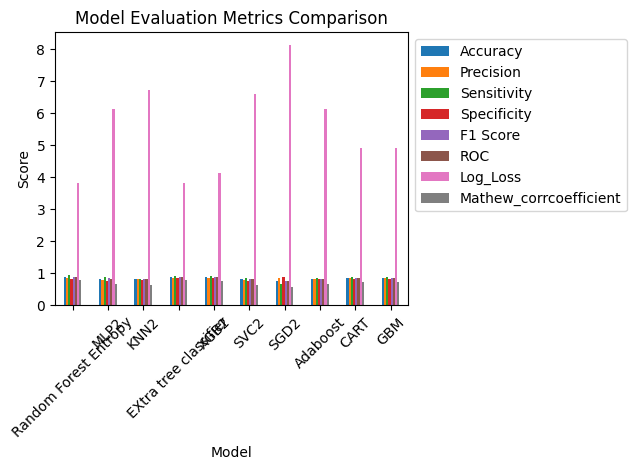

In [95]:
import matplotlib.pyplot as plt

# Set the index of the DataFrame to 'Model'
model_results.set_index('Model', inplace=True)

# Plotting the evaluation metrics for each model
plt.figure(figsize=(12, 8))
model_results.plot(kind='bar', stacked=False)
plt.title('Model Evaluation Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,eclf1.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,eclf1.predict_proba(X_test),label='Soft voting classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

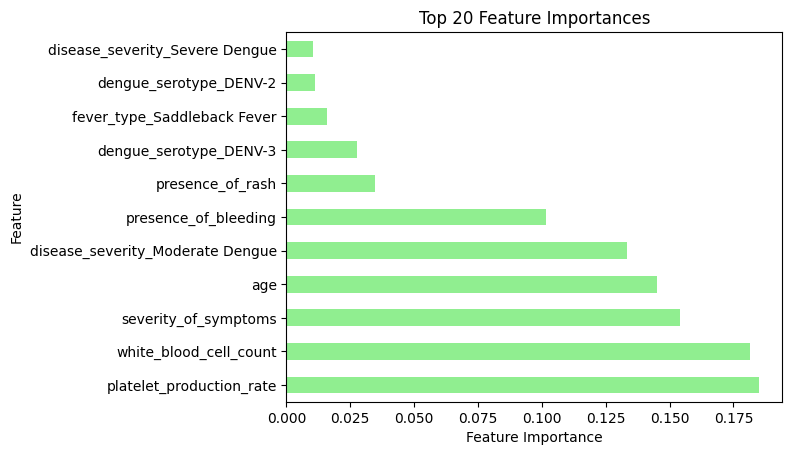

In [96]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
top_20_features = feat_importances.nlargest(20)

# Define the color you want
bar_color = 'lightgreen'

# Plot the bar chart with the specified color
top_20_features.plot(kind='barh', color=bar_color)

# Customize the plot
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.show()


## 13. Conclusion  <a id='data-conc'></a>

- Stacked ensemble machine learning algorithms resulted in higher performance than any individual machine learning model.
- We have also interpreted second best performing algo i.e., random forest algorithm
- The top 5 most contribution features are:
1. **Max heart Rate achieved**<br>
2. **Cholestrol**<br>
3. **st_depression**<br>
4. **Age**<br>
5. **exercise_induced_angina**<br>